In [86]:
from distutils.errors import DistutilsSetupError


cd C:\Users\kalai
\Downloads\Flowers_Dataset

C:\Users\kalai\Downloads\Flowers_Dataset


In [87]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is D47C-7FDE

 Directory of C:\Users\kalai\Downloads\Flowers_Dataset

04-10-2022  21:03    <DIR>          .
04-10-2022  21:08    <DIR>          ..
04-10-2022  22:30    <DIR>          flowers
               0 File(s)              0 bytes
               3 Dir(s)  168,345,559,040 bytes free


In [88]:
cd flowers

C:\Users\kalai\Downloads\Flowers_Dataset\flowers


In [89]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is D47C-7FDE

 Directory of C:\Users\kalai\Downloads\Flowers_Dataset\flowers

04-10-2022  22:30    <DIR>          .
04-10-2022  21:03    <DIR>          ..
04-10-2022  21:04    <DIR>          daisy
04-10-2022  21:04    <DIR>          dandelion
04-10-2022  22:30       443,984,952 flowers.h5
04-10-2022  21:04    <DIR>          rose
04-10-2022  21:04    <DIR>          sunflower
04-10-2022  21:05    <DIR>          tulip
               1 File(s)    443,984,952 bytes
               7 Dir(s)  168,345,559,040 bytes free


In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [91]:
x_train = train_datagen.flow_from_directory(r'C:\Users\kalai\Downloads\Flowers_Dataset\flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [92]:
x_test = train_datagen.flow_from_directory(r'C:\Users\kalai\Downloads\Flowers_Dataset\flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [93]:
x_train.class_indices



{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
from tensorflow.keras.layers import Convolution2D ,MaxPooling2D, Flatten

In [96]:
model=Sequential()

In [97]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [98]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [99]:
model.add(Flatten())

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))

In [102]:
model.add(Dense(5,activation='softmax'))

In [103]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [104]:
len(x_train)

180

In [105]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


C:\Users\kalai\AppData\Local\Temp/ipykernel_9296/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


180/180 [==============================] - 33s 180ms/step - loss: 1.3801 - accuracy: 0.4346 - val_loss: 1.1006 - val_accuracy: 0.5515
Epoch 2/10
180/180 [==============================] - 28s 157ms/step - loss: 1.0579 - accuracy: 0.5803 - val_loss: 1.0672 - val_accuracy: 0.5724
Epoch 3/10
180/180 [==============================] - 28s 158ms/step - loss: 0.9719 - accuracy: 0.6213 - val_loss: 0.8891 - val_accuracy: 0.6743
Epoch 4/10
180/180 [==============================] - 27s 148ms/step - loss: 0.8794 - accuracy: 0.6581 - val_loss: 0.8212 - val_accuracy: 0.6880
Epoch 5/10
180/180 [==============================] - 27s 151ms/step - loss: 0.8280 - accuracy: 0.6857 - val_loss: 0.7977 - val_accuracy: 0.7016
Epoch 6/10
180/180 [==============================] - 28s 154ms/step - loss: 0.8031 - accuracy: 0.6989 - val_loss: 0.7009 - val_accuracy: 0.7387
Epoch 7/10
180/180 [==============================] - 28s 155ms/step - loss: 0.7630 - accuracy: 0.7155 - val_loss: 0.6681 - val_accuracy: 0.7

In [111]:
model.save('flowers.h5')

In [112]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is D47C-7FDE

 Directory of C:\Users\kalai\Downloads\Flowers_Dataset\flowers

04-10-2022  22:30    <DIR>          .
04-10-2022  21:03    <DIR>          ..
04-10-2022  21:04    <DIR>          daisy
04-10-2022  21:04    <DIR>          dandelion
04-10-2022  22:53       111,866,864 flowers.h5
04-10-2022  21:04    <DIR>          rose
04-10-2022  21:04    <DIR>          sunflower
04-10-2022  21:05    <DIR>          tulip
               1 File(s)    111,866,864 bytes
               7 Dir(s)  168,676,397,056 bytes free


In [113]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [118]:
model=load_model('Flowers.h5')

In [123]:
img=image.load_img(r'C:\Users\kalai\Downloads\Flowers_Dataset\flowers\daisy\2346726545_2ebce2b2a6.jpg')

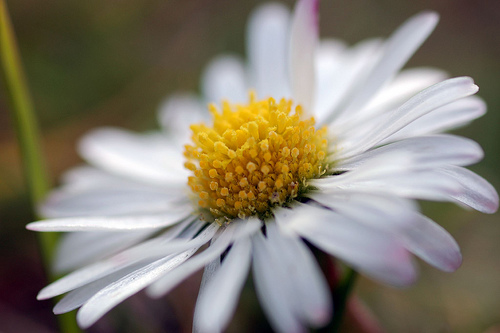

In [124]:
img

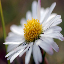

In [126]:
img=image.load_img(r'C:\Users\kalai\Downloads\Flowers_Dataset\flowers\daisy\2346726545_2ebce2b2a6.jpg',target_size=(64,64))
img

In [128]:
x=image.img_to_array(img)

In [129]:
x

array([[[113.,  89.,  41.],
        [ 67.,  57.,  30.],
        [ 71.,  59.,  35.],
        ...,
        [ 61.,  45.,  45.],
        [ 62.,  46.,  46.],
        [ 65.,  47.,  47.]],

       [[125., 100.,  43.],
        [ 66.,  56.,  29.],
        [ 68.,  56.,  32.],
        ...,
        [ 62.,  46.,  46.],
        [ 62.,  46.,  46.],
        [ 60.,  46.,  45.]],

       [[134., 110.,  36.],
        [ 63.,  53.,  28.],
        [ 62.,  51.,  29.],
        ...,
        [ 62.,  48.,  47.],
        [ 61.,  47.,  46.],
        [ 64.,  50.,  49.]],

       ...,

       [[ 53.,  27.,  38.],
        [ 54.,  31.,  41.],
        [ 51.,  28.,  38.],
        ...,
        [ 92.,  88.,  59.],
        [ 87.,  82.,  53.],
        [ 81.,  74.,  46.]],

       [[ 55.,  32.,  42.],
        [ 57.,  36.,  45.],
        [ 56.,  35.,  44.],
        ...,
        [ 83.,  80.,  45.],
        [ 77.,  72.,  42.],
        [ 82.,  70.,  48.]],

       [[ 57.,  34.,  44.],
        [ 59.,  37.,  49.],
        [ 59.,  

In [130]:
x=np.expand_dims(x,axis=0)

In [131]:
x

array([[[[113.,  89.,  41.],
         [ 67.,  57.,  30.],
         [ 71.,  59.,  35.],
         ...,
         [ 61.,  45.,  45.],
         [ 62.,  46.,  46.],
         [ 65.,  47.,  47.]],

        [[125., 100.,  43.],
         [ 66.,  56.,  29.],
         [ 68.,  56.,  32.],
         ...,
         [ 62.,  46.,  46.],
         [ 62.,  46.,  46.],
         [ 60.,  46.,  45.]],

        [[134., 110.,  36.],
         [ 63.,  53.,  28.],
         [ 62.,  51.,  29.],
         ...,
         [ 62.,  48.,  47.],
         [ 61.,  47.,  46.],
         [ 64.,  50.,  49.]],

        ...,

        [[ 53.,  27.,  38.],
         [ 54.,  31.,  41.],
         [ 51.,  28.,  38.],
         ...,
         [ 92.,  88.,  59.],
         [ 87.,  82.,  53.],
         [ 81.,  74.,  46.]],

        [[ 55.,  32.,  42.],
         [ 57.,  36.,  45.],
         [ 56.,  35.,  44.],
         ...,
         [ 83.,  80.,  45.],
         [ 77.,  72.,  42.],
         [ 82.,  70.,  48.]],

        [[ 57.,  34.,  44.],
       

In [132]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 2s 2s/step


In [133]:
y

array([0], dtype=int64)

In [134]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [137]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [141]:
index[y[0]]

'daisy'